In [2]:
import pandas as pd

C:\Users\bhavy\AppData\Local\Temp\ipykernel_29920\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import numpy as np
df=pd.read_csv('C:\\Users\\bhavy\\Downloads\\fashion\\fashion-mnist_train.csv')

In [4]:
df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [7]:
df.shape


(60000, 785)

In [8]:
df=df.sample(frac=0.3).reset_index(drop=True)
df.shape

(18000, 785)

In [9]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,0,0,0,0,0,0,0,1,0,...,9,0,0,11,56,4,2,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,60,...,123,111,43,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
LOOKUP={
    0:"T-shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}

In [11]:
def display_image(features, actual_label):
    print("Actual label: ",LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [12]:
X=df[df.columns[1:]]
Y=df["label"]

In [13]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,1,0,0,...,9,0,0,11,56,4,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,60,110,...,123,111,43,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y.head()

0    6
1    5
2    0
3    7
4    7
Name: label, dtype: int64

In [15]:
X.loc[5].values[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
Y.loc[5]

5

Actual label:  Sandal


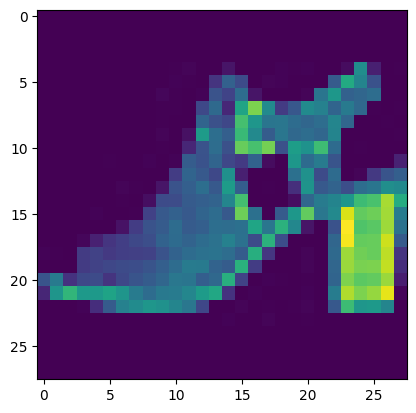

In [17]:
display_image(X.loc[5].values,Y.loc[5])

Actual label:  Trouser


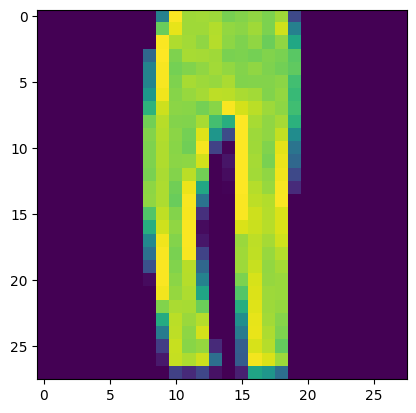

In [18]:
display_image(X.loc[567].values,Y.loc[567])

Actual label:  Coat


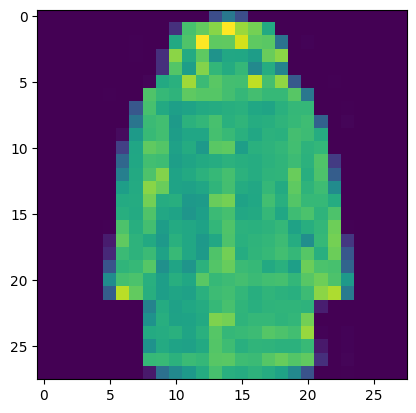

In [19]:
display_image(X.loc[15088].values,Y.loc[15088])

In [20]:
X=X/255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,...,0.035294,0.000000,0.000000,0.043137,0.219608,0.015686,0.007843,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.235294,0.431373,...,0.482353,0.435294,0.168627,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [22]:
x_train.shape,y_train.shape

((14400, 784), (14400,))

In [23]:
def summarize_classification(y_test,y_pred,avg_method="weighted"):
    acc=accuracy_score(y_test,y_pred,normalize=True)
    num_acc=accuracy_score(y_test,y_pred,normalize=True)
    prec=precision_score(y_test,y_pred,average="weighted")
    recall=recall_score(y_test,y_pred,average="weighted")
    print("Test data count: ",len(y_test))
    print("accuracy_count",num_acc)
    print("accuracy_score",acc)
    print("precision_score",prec)
    print("recall_score",recall)

In [26]:
logistic_model=LogisticRegression(solver="sag",multi_class="auto",max_iter=10000).fit(x_train,y_train)